## Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob

# Download NLTK stopwords and punkt tokenizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Load the Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset .csv")

## Preprocess the Dataset

In [ ]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
# Deleting Unnecessary Columns
columns_to_drop = ['Country Code', 'Address', 'Locality', 'Locality Verbose', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']
df.drop(columns=columns_to_drop, inplace=True)


In [ ]:
# Removing the Duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Remove the NaN values from the dataset
df.dropna(subset=['Cuisines'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   City                  9542 non-null   object 
 3   Longitude             9542 non-null   float64
 4   Latitude              9542 non-null   float64
 5   Cuisines              9542 non-null   object 
 6   Average Cost for two  9542 non-null   int64  
 7   Price range           9542 non-null   int64  
 8   Aggregate rating      9542 non-null   float64
 9   Votes                 9542 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 820.0+ KB


<ipython-input-8-89eaaabaa34f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Price range', data=df, palette='plasma')


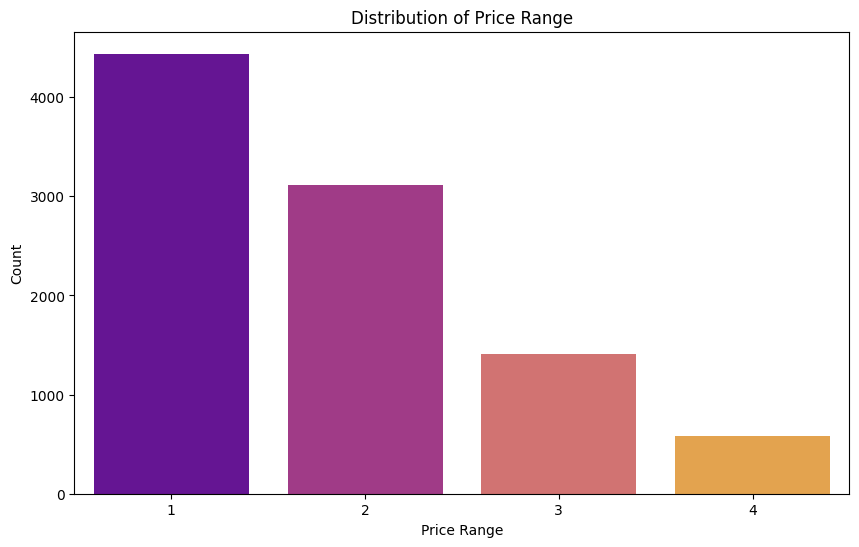

In [ ]:
# Distribution of Price Range
plt.figure(figsize=(10, 6))
sns.countplot(x='Price range', data=df, palette='plasma')
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()


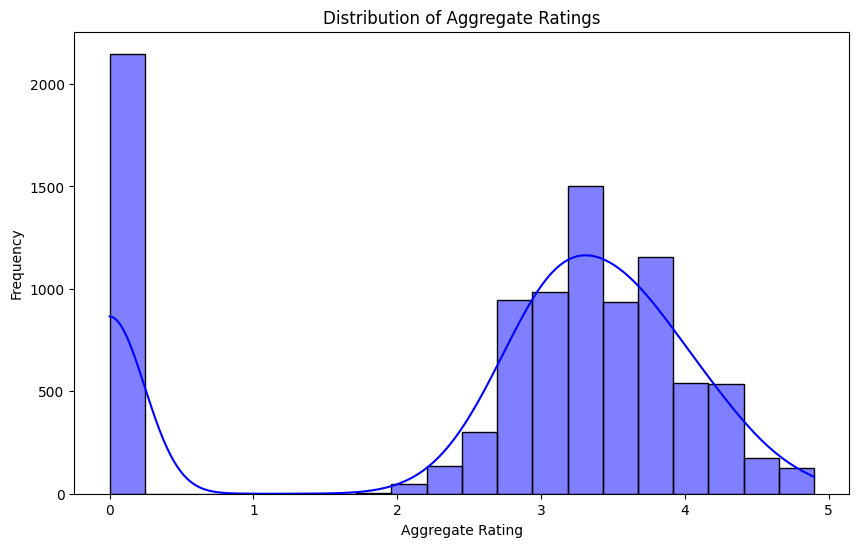

In [ ]:
# Average Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Aggregate rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

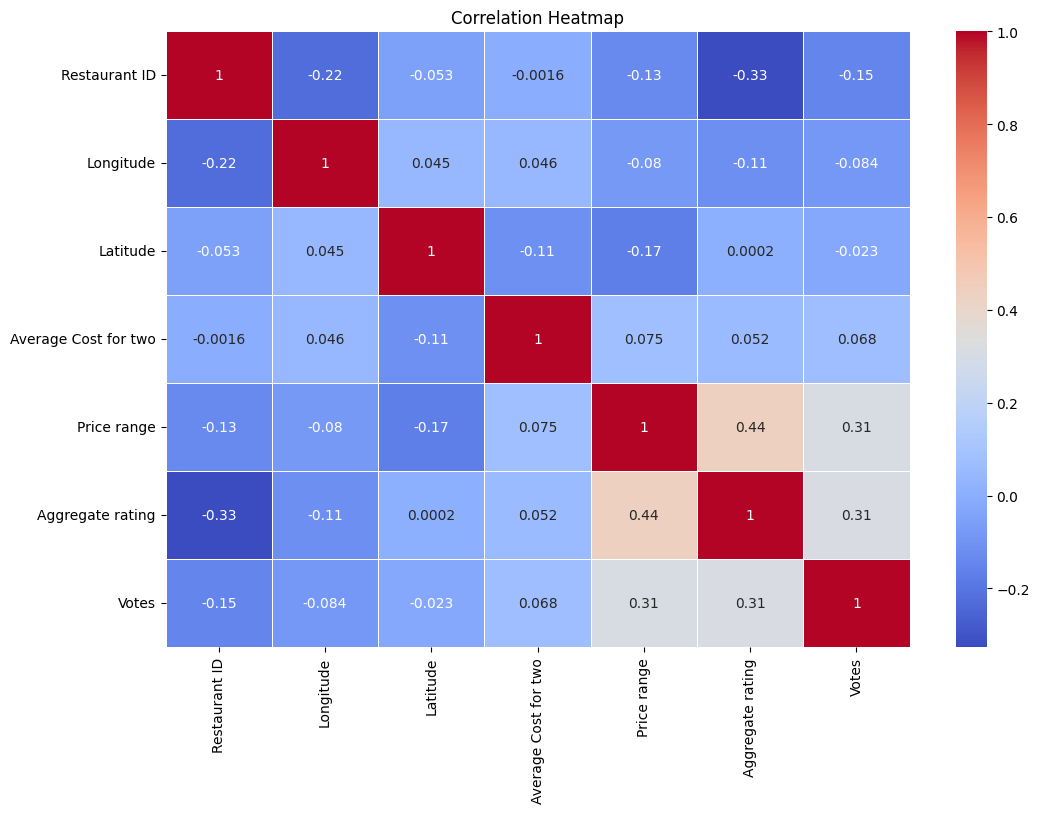

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Changing the column names
new_column_names = {
    'Restaurant ID': 'restaurant_id',
    'Restaurant Name': 'restaurant_name',
    'City': 'city',
    'Longitude': 'longitude',
    'Latitude': 'latitude',
    'Cuisines': 'cuisines',
    'Average Cost for two': 'average_cost_for_two',
    'Price range': 'price_range',
    'Aggregate rating': 'aggregate_rating',
    'Votes': 'votes'
}
df.rename(columns=new_column_names, inplace=True)

# Adjust the column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

## Encode Categorical Variables and Split Data

In [ ]:
# Encode categorical variables using TF-IDF vectorization
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['cuisines'])

# Target variable (for simplicity, let's assume we are interested in classifying the first cuisine type)
df['primary_cuisine'] = df['cuisines'].apply(lambda x: x.split()[0] if x else 'unknown')
y = df['primary_cuisine']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train Classification Models

In [ ]:
# Train a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Train a Random Forest Classifier model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Evaluate the Models

In [ ]:
# Evaluate Logistic Regression model
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_logreg, average='weighted'))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))


Logistic Regression Performance:
Accuracy: 0.7972760607647983
Precision: 0.7549603660358496
Recall: 0.7972760607647983
Classification Report:
                 precision    recall  f1-score   support

      Afghani,       0.00      0.00      0.00         1
      American       0.00      0.00      0.00         3
     American,       0.63      0.88      0.74        52
       Andhra,       0.00      0.00      0.00         1
         Asian       0.00      0.00      0.00         4
        Asian,       0.67      0.43      0.52        14
           BBQ       1.00      1.00      1.00         2
          BBQ,       0.00      0.00      0.00         3
        Bakery       0.89      1.00      0.94        33
       Bakery,       0.90      0.93      0.92        76
           Bar       0.00      0.00      0.00         6
      Bengali,       1.00      0.25      0.40         4
     Beverages       1.00      1.00      1.00         9
    Beverages,       0.00      0.00      0.00         4
       Biryani  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWa

In [ ]:
# Evaluate Random Forest Classifier model
y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classifier Performance:
Accuracy: 0.8281822943949712
Precision: 0.8225269768377095
Recall: 0.8281822943949712
Classification Report:
                 precision    recall  f1-score   support

      Afghani,       0.00      0.00      0.00         1
      American       1.00      1.00      1.00         3
     American,       0.90      0.83      0.86        52
       Andhra,       0.00      0.00      0.00         1
      Arabian,       0.00      0.00      0.00         0
         Asian       1.00      0.75      0.86         4
        Asian,       0.71      0.36      0.48        14
           BBQ       1.00      1.00      1.00         2
          BBQ,       1.00      0.67      0.80         3
        Bakery       1.00      1.00      1.00        33
       Bakery,       0.86      0.97      0.91        76
           Bar       0.67      0.33      0.44         6
      Bengali,       0.75      0.75      0.75         4
     Beverages       1.00      1.00      1.00         9
    Beverag

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWa

In [ ]:
def print_performance_report(report, model_name):
    print(f"{model_name} Performance per Cuisine:")
    print(f"{'Cuisine':<20}{'Precision':<10}{'Recall':<10}{'F1-Score':<10}")
    print("="*50)
    for cuisine, metrics in report.items():
        if cuisine in ['accuracy', 'macro avg', 'weighted avg']:
            continue
        print(f"{cuisine:<20}{metrics['precision']:<10.2f}{metrics['recall']:<10.2f}{metrics['f1-score']:<10.2f}")

# Logistic Regression Performance
logreg_report = classification_report(y_test, y_pred_logreg, output_dict=True)
print_performance_report(logreg_report, "Logistic Regression")

# Random Forest Performance
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
print_performance_report(rf_report, "Random Forest")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Logistic Regression Performance per Cuisine:
Cuisine             Precision Recall    F1-Score  
Afghani,            0.00      0.00      0.00      
American            0.00      0.00      0.00      
American,           0.63      0.88      0.74      
Andhra,             0.00      0.00      0.00      
Asian               0.00      0.00      0.00      
Asian,              0.67      0.43      0.52      
BBQ                 1.00      1.00      1.00      
BBQ,                0.00      0.00      0.00      
Bakery              0.89      1.00      0.94      
Bakery,             0.90      0.93      0.92      
Bar                 0.00      0.00      0.00      
Bengali,            1.00      0.25      0.40      
Beverages           1.00      1.00      1.00      
Beverages,          0.00      0.00      0.00      
Biryani             1.00      1.00      1.00      
Biryani,            0.80      0.57      0.67      
Brazilian           0.00      0.00      0.00      
Brazilian,          0.50      0.50   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Generate classification report for Decision Tree
dt_report = classification_report(y_test, y_pred_dt, output_dict=True)

# Calculate average precision for Decision Tree
dt_avg_precision = calculate_average_precision(dt_report)

# Update the DataFrame to include Decision Tree
model_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'Decision Tree'],
    'Precision': [rf_avg_precision, logreg_avg_precision, dt_avg_precision]
})

print("Model Comparison Chart:")
print(model_comparison)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

NameError: name 'calculate_average_precision' is not defined